In [1]:
#Load libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\user\AppData\Local\Temp\ipykernel_27424\3070330209.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
counts = pd.read_csv('C:/Users/user/Downloads/2117ensemble.csv')

In [3]:
counts = counts.transpose()
counts.columns = counts.iloc[0] 
counts = counts.drop(counts.index[0])
counts = counts.astype(float)

In [4]:
sample = pd.read_csv('c:/Users/user/Downloads/clin2117.csv')

In [5]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
sample['Label']=labelencoder.fit_transform(sample.iloc[:,3].values)

In [6]:
#  split data for train and test
y =  sample['Label']
X_train, X_test, y_train, y_test = train_test_split(counts,
                                                    y,
                                                    test_size = 0.3,random_state=132)
                                                
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)

X_train shape (130, 18482)
X_test shape (56, 18482)


In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# SVM classifier
svm_classifier = SVC(kernel='linear')  # You can also use other kernels like 'rbf' or 'poly'

# train the SVM classifier
svm_classifier.fit(X_train, y_train)

# predictions on the test set
y_pred = svm_classifier.predict(X_test)

# evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9642857142857143


In [8]:
from sklearn.metrics import confusion_matrix
 
# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# true positives, false negatives, true negatives, and false positives
tn, fp, fn, tp = cm.ravel()

# sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.9565217391304348
Specificity: 0.9696969696969697


In [13]:
print(cm)

[[32  1]
 [ 1 22]]


bincount prediction: [33 23]


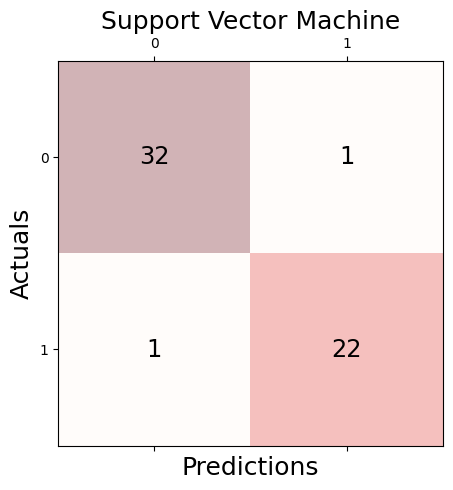

In [22]:

preds = svm_classifier.predict(X_test)
prediction =[]
for i in preds:
    if i >=0.5:
        prediction.append(1)
    else:
        prediction.append(0)
print("bincount prediction:", np.bincount(prediction))
conf_matrix = confusion_matrix(y_true = y_test, y_pred=prediction)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Support Vector Machine', fontsize=18)
plt.show()

In [10]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))

Accuracy: 0.964
F1 Score: 0.957
Precision: 0.957
Recall: 0.957
